In [1]:
import sys
sys.path.insert(0, "../")

import math

import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

import shapely.geometry as geom
import geopandas as gpd

from weavingspace import TileUnit
from weavingspace import WeaveUnit
from weavingspace import Tiling
from weavingspace import tiling_utils

import shapely
shapely.__version__, np.__version__

('2.0.6', '2.0.2')

<Axes: >

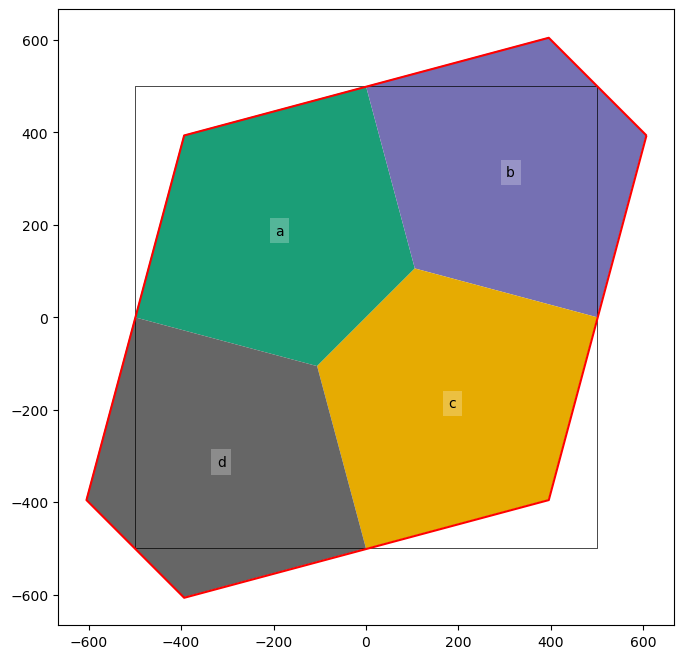

In [2]:
t = TileUnit(tiling_type="cairo", spacing=1000)
t.plot()

In [3]:
region = gpd.read_file("/Users/david/Documents/teaching/GISC-422/labs/scratch/election2017.geojson")

In [4]:
t.tiles.to_crs(region.crs)
tiling = Tiling(t, region)

Unable to union input data set due to TopologyException: side location conflict at 175.95930316205533 -37.632519762845845. This can occur if the input geometry is invalid.


IndexError: index out of range

n_sides=6 n_slices=12 offset=1


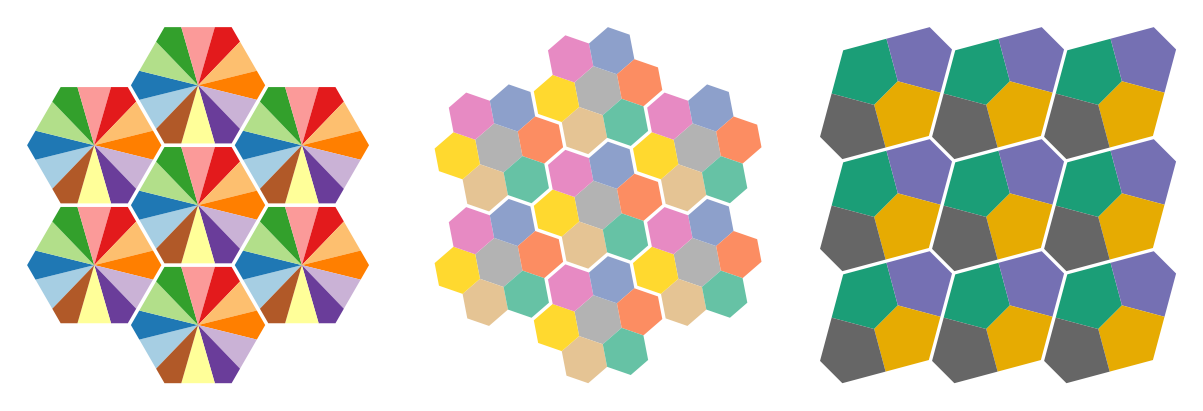

In [48]:
region = gpd.GeoDataFrame({"geometry": gpd.GeoSeries([shapely.geometry.Polygon([(-3000, -3000), (-3000, 3000), (3000, 3000), (3000, -3000)])])}, crs = 3857)
t1 = TileUnit(tiling_type="hex-slice", n = 12, offset = 1).inset_prototile(15)
t1 = t1.get_local_patch(include_0=True)
t2 = TileUnit(tiling_type="hex-colouring", n = 7).inset_prototile(15)
t2 = t2.get_local_patch(include_0=True)
t3 = TileUnit(tiling_type="cairo").inset_prototile(15)
t3 = t3.get_local_patch(include_0=True)

fig, axs = plt.subplots(ncols=3, nrows=1, figsize = (12, 4), 
                        constrained_layout=True)
# fig()
for t, a, cm in zip([t1, t2, t3], axs, ["Paired", "Set2_r", "Dark2"]):
  t.plot(column = "tile_id", ax = a, cmap = cm)
  a.set_axis_off()


In [13]:
t1

TileUnit(tiles=  tile_id                                           geometry
0       a  POLYGON ((-442.721 353.363, -286.493 488.661, ...
1       b  POLYGON ((-527.382 -206.726, -566.439 -3.78, -...
2       c  GEOMETRYCOLLECTION (POLYGON ((-84.661 -560.09,...
3       d  POLYGON ((442.721 -353.363, 286.493 -488.661, ...
4       e  POLYGON ((527.382 206.726, 566.439 3.78, 401.4...
5       f  GEOMETRYCOLLECTION (POLYGON ((84.661 560.09, 2..., prototile=                                            geometry
0  POLYGON ((-288.675 -500, -577.35 0, -288.675 5..., spacing=1000.0, base_shape=<TileShape.HEXAGON: 'hexagon'>, vectors={(0, 1, -1): (0.0, 1000.0), (1, 0, -1): (866.025404, 500.0), (1, -1, 0): (866.025404, -500.0), (0, -1, 1): (0.0, -1000.0), (-1, 0, 1): (-866.025404, -500.0), (-1, 1, 0): (-866.025404, 500.0)}, regularised_prototile=                                            geometry
0  POLYGON ((-329.914 -285.714, -536.111 -214.286..., crs=3857, rotation=0.0, debug=False, tiling_type='l

In [ ]:
t = WeaveUnit(weave_type = "cube", strands = "abc|def|ghi", aspect = 3/4, spacing = 250)

In [ ]:
# t = TileUnit(tiling_type = "cross", code = "4.8.8", n = 5, offset = 0) \
#     # .inset_prototile(0)
t = [WeaveUnit(weave_type = "cube", strands = "abc|def|ghi", aspect = a, spacing = 250) for a in np.linspace(0.7,0.8,51)]
# t.plot(r = 0, show_vectors = False, show_ids = False, show_prototile = False, show_reg_prototile = True)

# Scratch pad
A barebones notebook for testing basic operations of the package. The above code loads necessary libraries and allows for making a map.

In [ ]:
# ak = gpd.read_file("data/imd-auckland-2018.gpkg")

In [ ]:
# tile = TileUnit(tiling_type="square-colouring", 
#                 code="3.3.4.3.4", 
#                 spacing=500, 
#                 n=8, 
#                 crs=ak.crs) \
#                   .inset_prototile(10).inset_tiles(0)
# tile.plot(r=1)


In [ ]:
# n = tile.tiles.shape[0]
# vars = dict(zip(list("abcdefghijkl")[:n], [x for x in ak.columns if "Rank" in x][:n]))
# cmaps = dict(zip(vars.values(), ["Reds", "Oranges", "Greens", "Blues", 
#                                  "Purples", "Greys", "YlOrBr", "PuRd", 
#                                  "YlOrRd", "BuGn", "BuPu", "YlGnBu" ][:n]))
# tiling = Tiling(tile, ak)
# map = tiling.get_tiled_map()
# fig = map.render(variables=vars, colourmaps=cmaps, use_ellipse=True)